# Basic manipulation of circuits

The goal of this notebook is to explore main possibilities and manipulation of quantum circuits offered by ``MPQP``.

## Instantiation and display the circuit

We first import ``QCircuit``, the class representing quantum circuits.

In [1]:
from mpqp import QCircuit

The first argument taken by the constructor of ``QCircuit`` is either the number of qubits, or a list of ``Instruction``.

One can instanciate an empty circuit by only giving its number of qubits. The number of classical bits is automatically handled by the class, and thus is optional. We can also attach to a circuit a given label. 

In [4]:
circ1 = QCircuit(3)
circ2 = QCircuit(5, nb_cbits=2, label="Example")

Then, one can ``add`` at the end of the circuit an instruction or list of instructions. For that, we add the right imports.

In [2]:
from mpqp.gates import *
from mpqp.measures import BasisMeasure
from mpqp import Barrier

In [5]:
circ2.add(CNOT(2,3))
circ2.add([H(0), T(1), CNOT(0,1), S(4)])

As previously stated, we can also instantiate and initialize the circuit with a list of `Instruction` (gates or measurements).

In [6]:
circ3 = QCircuit(
    [
        H(0),
        X(1),
        CNOT(1, 2),
        Barrier(),
        Y(2),
        Z(0),
        CZ(1, 0),
        BasisMeasure([0, 1, 2], shots=1024),
    ]
)

We can then print the circuit directly as a string, or use ``pretty_print`` for more detailed information on the circuit.

In [6]:
print(circ2)

     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ T ├┤ X ├
     └───┘└───┘
q_2: ──■───────
     ┌─┴─┐     
q_3: ┤ X ├─────
     ├───┤     
q_4: ┤ S ├─────
     └───┘     
c: 2/══════════
               


In [7]:
circ3.pretty_print()

QCircuit : Size (Qubits,Cbits) = (3, 3), Nb instructions = 8
     ┌───┐      ░ ┌───┐   ┌─┐   
q_0: ┤ H ├──────░─┤ Z ├─■─┤M├───
     ├───┤      ░ └───┘ │ └╥┘┌─┐
q_1: ┤ X ├──■───░───────■──╫─┤M├
     └───┘┌─┴─┐ ░ ┌───┐┌─┐ ║ └╥┘
q_2: ─────┤ X ├─░─┤ Y ├┤M├─╫──╫─
          └───┘ ░ └───┘└╥┘ ║  ║ 
c: 3/═══════════════════╩══╩══╩═
                        2  0  1 


We can also use the method ``display`` to render the circuit in different formats. The default one uses matplotlib, but other options can be given in parameters (the same as the ``qiskit`` display function).

c:\Users\Henri\anaconda3\lib\site-packages\mpqp\core\circuit.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


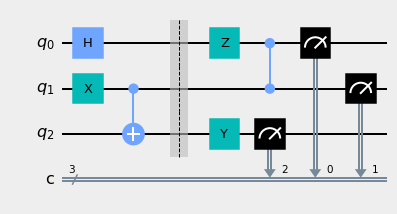

In [8]:
circ3.display()

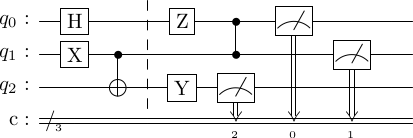

In [9]:
circ3.display("latex")

## Retrieve circuit properties

One can also retrieve different properties of the circuit, including the depth, the size (quantum and classical bits), counting (specific) gates and retrieving the attached measurements.

In [10]:
circ3.depth()

4

In [11]:
circ3.size()

(3, 3)

In [12]:
circ3.count_gates(X)

1

In [ ]:
circ3.measurements

[BasisMeasure([0, 1, 2], shots=1024)]

## Combination of circuits

We also allow combinations of circuits. 

In [7]:
circ1 = QCircuit([H(0), S(1), CNOT(0,1)])
circ2 = QCircuit([X(0)])
print(circ1)
print('-------------')
print(circ2)

     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ S ├┤ X ├
     └───┘└───┘
-------------
   ┌───┐
q: ┤ X ├
   └───┘


One can ``append`` a circuit to another, consisting in concatenating the circuit horizontally at the right of the first one. For more simplicity, the ``+`` realized the same operation. When the size does not match, we automatically adjust the size of the resulting circuit.

In [8]:
appended = circ1 + circ2
print(appended)

     ┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ X ├
     ├───┤┌─┴─┐└───┘
q_1: ┤ S ├┤ X ├─────
     └───┘└───┘     


One can also take the tensor product of two circuits using the method ``tensor``, or the symbol ``@``, which will concatenate the second circuit vertically under the first.

In [9]:
tensored = circ1 @ circ2
print(tensored)

     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ S ├┤ X ├
     ├───┤└───┘
q_2: ┤ X ├─────
     └───┘     


## Translating the circuit

MPQP is a multi-platform quantum programming library and handles for the user the translation of circuits. We allow the user to use a function to export the circuit in different objects specific to each SDK using the method ``to_other_language``. 

In [10]:
from mpqp import Language

circ3.to_other_language(Language.QISKIT)

In [11]:
circ3.to_other_language(Language.MY_QLM)

Circuit(ops=[Op(gate='H', qbits=[0], type=0, cbits=None, formula=None, remap=None), Op(gate='X', qbits=[1], type=0, cbits=None, formula=None, remap=None), Op(gate='CNOT', qbits=[1, 2], type=0, cbits=None, formula=None, remap=None), Op(gate='Y', qbits=[2], type=0, cbits=None, formula=None, remap=None), Op(gate='Z', qbits=[0], type=0, cbits=None, formula=None, remap=None), Op(gate='CSIGN', qbits=[1, 0], type=0, cbits=None, formula=None, remap=None)], name=None, gateDic={'X': GateDefinition(name='X', arity=1, matrix=Matrix(nRows=2, nCols=2, data=[ComplexNumber(re=0.0, im=0.0), ComplexNumber(re=1.0, im=0.0), ComplexNumber(re=1.0, im=0.0), ComplexNumber(re=0.0, im=0.0)]), is_ctrl=False, is_dag=None, is_trans=None, is_conj=None, subgate=None, syntax=GSyntax(name='X', parameters=[]), nbctrls=None, circuit_implementation=None), 'Y': GateDefinition(name='Y', arity=1, matrix=Matrix(nRows=2, nCols=2, data=[ComplexNumber(re=0.0, im=0.0), ComplexNumber(re=-0.0, im=-1.0), ComplexNumber(re=0.0, im=1.

In [12]:
circ3.to_other_language(Language.BRAKET)

c:\Users\JulienCalisto\Documents\MPQP_main_repo\mpqp\.venv\lib\site-packages\mpqp\qasm\qasm_to_braket.py:80: UnsupportedBraketFeaturesWarning: 
This program uses OpenQASM language features that may not be supported on QPUs or on-demand simulators.
  warnings.warn(



Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubit_count': 2), 'target': QubitSet([Qubit(1), Qubit(2)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Y('qubit_count': 1), 'target': QubitSet([Qubit(2)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Z('qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CZ('qubit_count': 2), 'target': QubitSet([Qubit(1), Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1)])

In [13]:
circ3.to_other_language(Language.CIRQ)

q_0: ───H───Z───@───M('c_0')───
                │
q_1: ───X───@───@───M('c_1')───
            │
q_2: ───────X───Y───M('c_2')───

Since we use OpenQASM as a common standard for circuit translation, we also provide for the user a way to retrive the code of the circuit in OpenQASM 2.0 and 3.0.

In [ ]:
print(circ3.to_other_language(Language.QASM2))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c[3];
h q[0];
x q[1];
cx q[1],q[2];
barrier q[0],q[1],q[2];
y q[2];
z q[0];
cz q[1],q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];



In [ ]:
print(circ3.to_other_language(Language.QASM3))

OPENQASM 3.0;
include "stdgates.inc";

qubit[3] q;
bit[3] c;
h q[0];
x q[1];
cx q[1],q[2];
barrier q[0],q[1],q[2];
y q[2];
z q[0];
cz q[1],q[0];
c[0] = measure q[0];
c[1] = measure q[1];
c[2] = measure q[2];



## Parametrized circuit

We allow the use and manipulation of symbolic variable to parametrize gates. 

We first declare symbolic variables using `symbols` (yes, we indeed use `sympy`!).

In [ ]:
from sympy import symbols

theta, k = symbols("θ k")

We can then use these variables to instantiate and add ``ParametrizedGate`` to the circuit.

In [ ]:
param_circ = QCircuit(
    [Rx(theta, 0), CNOT(1,2), X(2), Rk(k,1), H(0), CRk(k, 0, 2),
    BasisMeasure(list(range(3)), shots=1000)]
)

One can observe, in the print below, that 3 gates depend on variables.  

In [ ]:
print(param_circ)

     ┌───────┐       ┌───┐                              ┌─┐   
q_0: ┤ Rx(θ) ├───────┤ H ├─────────■────────────────────┤M├───
     └───────┘┌──────┴───┴───────┐ │                 ┌─┐└╥┘   
q_1: ────■────┤ P(2**(1 - k)*pi) ├─┼─────────────────┤M├─╫────
       ┌─┴─┐  └──────┬───┬───────┘ │P(2**(1 - k)*pi) └╥┘ ║ ┌─┐
q_2: ──┤ X ├─────────┤ X ├─────────■──────────────────╫──╫─┤M├
       └───┘         └───┘                            ║  ║ └╥┘
c: 3/═════════════════════════════════════════════════╩══╩══╩═
                                                      1  0  2 


If we want to attribute values to the parameters, one can use the method ``subs`` as follows. This will return a new circuit with the gates' parameters given in ``subs``. One can also choose to substitute symbolic variable with real and complex numbers when call the ``run`` function (at execution).

In [ ]:
import numpy as np
print(param_circ.subs({theta: np.pi/3, k:2}))

     ┌─────────┐  ┌───┐               ┌─┐   
q_0: ┤ Rx(π/3) ├──┤ H ├────■──────────┤M├───
     └─────────┘┌─┴───┴──┐ │       ┌─┐└╥┘   
q_1: ─────■─────┤ P(π/2) ├─┼───────┤M├─╫────
        ┌─┴─┐   └─┬───┬──┘ │P(π/2) └╥┘ ║ ┌─┐
q_2: ───┤ X ├─────┤ X ├────■────────╫──╫─┤M├
        └───┘     └───┘             ║  ║ └╥┘
c: 3/═══════════════════════════════╩══╩══╩═
                                    1  0  2 


One can also retrieve the set of variables in the circuit by calling the ``variables()`` method.

In [ ]:
param_circ.variables()

{k, θ}